In [1]:
import pandas as pd
import os

In [2]:
music_df = pd.read_csv("spotify_top_music.csv")
music_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [3]:
music_df.groupby("year")["pop"].max()

year
2010    83
2011    81
2012    80
2013    88
2014    86
2015    84
2016    84
2017    87
2018    86
2019    99
Name: pop, dtype: int64

In [4]:
idx = music_df.groupby(["year"])["pop"].transform(max) == music_df["pop"]
pop_songs_year = music_df[idx]
pop_songs_year

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
51,52,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
104,105,Titanium (feat. Sia),David Guetta,dance pop,2012,126,79,60,-4,13,30,245,7,10,80
139,140,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
268,269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
269,270,I'm Not The Only One,Sam Smith,pop,2015,82,49,68,-6,8,49,239,53,4,84
270,271,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,84
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
443,444,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87


In [15]:
music_df.pivot_table(values=["spch", "bpm"], index="top genre", sort=True)

,bpm,spch
top genre,,
acoustic pop,155.000000,4.000000
alaska indie,132.000000,3.000000
alternative r&b,136.000000,13.000000
art pop,115.125000,6.500000
atl hip hop,102.800000,19.600000
australian dance,128.833333,11.500000
australian hip hop,95.000000,7.000000
australian pop,153.800000,9.200000
barbadian pop,125.333333,7.266667


In [39]:
import numpy as np
music_df.pivot_table(values="pop", index="top genre", columns="year", fill_value=0, margins=True).sort_values(by="All")

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
top genre,,,,,,,,,,,
canadian latin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,18.000000
alaska indie,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
hollywood,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
atl hip hop,57.666667,49.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
moroccan pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,0.000000,53.000000
hip pop,65.000000,0.000000,0.000000,59.000000,30.000000,49.000000,0.000000,0.000000,0.000000,0.000000,55.500000
colombian pop,56.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000
folk-pop,0.000000,0.000000,0.000000,0.000000,77.000000,0.000000,36.000000,0.000000,0.000000,0.000000,56.500000
french indie pop,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,58.000000


In [34]:
music_df["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

In [42]:
year_index = music_df.set_index("year")

In [43]:
year_index.loc[2010]

,Unnamed: 0,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,,,,,
2010,1,"Hey, Soul Sister",Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
2010,2,Love The Way You Lie,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2010,3,TiK ToK,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
2010,4,Bad Romance,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
2010,5,Just the Way You Are,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78
2010,6,Baby,Justin Bieber,canadian pop,65,86,73,-5,11,54,214,4,14,77
2010,7,Dynamite,Taio Cruz,dance pop,120,78,75,-4,4,82,203,0,9,77
2010,8,Secrets,OneRepublic,dance pop,148,76,52,-6,12,38,225,7,4,77
2010,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,93,37,48,-8,12,14,216,74,3,76


In [56]:
genre_year_idx = music_df.set_index(["year", "top genre"])
genre_year_idx.loc[[(2010, "pop")]]

Unnamed: 0                 title      artist  bpm  nrgy  dnce  \
year top genre                                                                  
2010 pop                 5  Just the Way You Are  Bruno Mars  109    84    64   
     pop                12             Marry You  Bruno Mars  145    83    62   
     pop                24                Misery    Maroon 5  103    81    70   

                dB  live  val  dur  acous  spch  pop  
year top genre                                        
2010 pop        -5     9   43  221      2     4   78  
     pop        -5    10   48  230     33     4   73  
     pop        -5    22   73  216      0     4   65

<AxesSubplot:title={'center':'Popularity By Year'}, xlabel='year'>

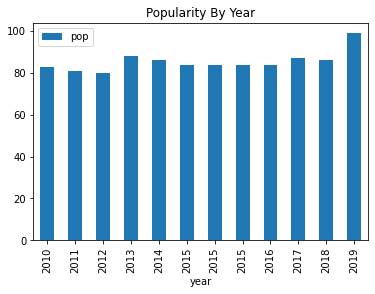

In [63]:
pop_songs_year.plot(x="year", y="pop", kind="bar", title="Popularity By Year")